# Probability Distributions Exercises

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

* What is the probability that no cars drive up in the noon hour?


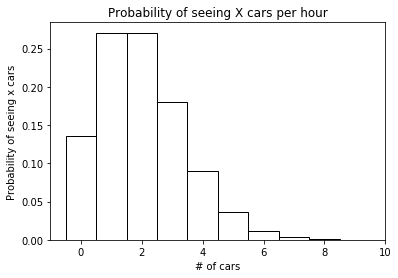

In [157]:
x = range(10)
y = stats.poisson(2).pmf(x)

plt.title("Probability of seeing X cars per hour")
plt.xlabel("# of cars")
plt.ylabel("Probability of seeing x cars")
plt.bar(x,y, color="white", edgecolor="black", width=1)
plt.show()

In [2]:
# # Theoredical 
# x = 2
# y = 

cars = stats.poisson(2)
cars.pmf(0)

0.1353352832366127

In [158]:
# practical**

cars_p = stats.poisson(2)
cars_p = cars_p.rvs((10_000, 1))
(cars_p == 0).mean()

0.1355

* What is the probability that 3 or more cars come through the drive through?


In [4]:
# Theoredical 

cars.sf(2)

0.32332358381693654

In [5]:
# Practical 

(cars_p >= 3).mean()

0.3274

* How likely is it that the drive through gets at least 1 car?

In [6]:
# Theoredical

cars.sf(0)

0.8646647167633873

In [159]:
# Practical**

(cars_p > 0).mean()

0.8645

## 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

* What grade point average is required to be in the top 5% of the graduating class?

In [8]:
# Python
grades_p = np.random.normal(3, .3, (10_000))
np.quantile(grades_p, .95)

3.5006333718441702

In [9]:
# Theoredical

grades = stats.norm(3, .3)

grades.isf(.05)

3.4934560880854417

* What GPA constitutes the bottom 15% of the class?


In [10]:
# Theoredical 

grades.ppf(.15)

2.689069983151863

In [11]:
# Practical 

np.quantile(grades_p, .15)

2.68730746264842

* An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [168]:
# Theoredical 

gpa = 2.8

grades_2 = grades.ppf(.2) # Max of range
grades_3 = grades.ppf(.3) # Min of range


grades_2 < gpa and gpa < grades_3

grades_2, grades_3

(2.7475136299281258, 2.842679846187588)

In [165]:
lower = np.quantile(grades_p,.2)
higher = np.quantile(grades_p,.3)

lower, higher

(2.7442745991137016, 2.839655748730239)

* If I have a GPA of 3.5, what percentile am I in?

In [15]:
# Theoredical 

grades.cdf(3.5)

0.9522096477271853

In [16]:
# Practical 

(grades_p >= 3.5).mean()

0.0504

## 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [121]:
stats.binom(4326, .02).sf(96)

0.1397582363130086

In [126]:
(np.random.choice([1,0], p=[.02, .98], size=(10_000, 4326)).sum(axis=1) >= 97).mean()

0.1397

##  4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [145]:
# theoredical 

p = 1/99
n = 60

stats.binom(n, p).sf(0)

0.4561828923578729

In [153]:
# practical 
answers = np.random.random(size=(100000, 60)).round(2)
correct_answers = np.random.random(size=(100000, 60)).round(2)

((answers == correct_answers).sum(axis=1) > 0).mean()

0.45058

## 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [21]:
#is it binomial because two possible events

p = .03
n = ((22 * 3) * .9)

clean = stats.binom(int(n),p)
clean.sf(0)

0.8342199288437355

In [173]:
# Experimental
#1 = clean, 0 = not clean

clean_p = np.random.choice([1,0], p=[.03,.97], size=(10_000, int(n)))
(clean_p.sum(axis=1) > 0).mean()

0.834

How likely is it that it goes two days without getting cleaned up? All week?

In [169]:
n_days = 2
(1- clean.sf(0)) ** n_days

0.027483031992576113

In [174]:
# experimental

(1 - (clean_p.sum(axis=1) > 0).mean()) ** 2

0.02755600000000001

In [175]:
#theoredical

n_days = 5
(1- clean.sf(0)) ** n_days

0.0001252165138809122

## 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [185]:
#theoredical

# order_time = 16 * 2 = 30
# your time = 10 + 2
# You have 45 min to get your food\
# if there is more than 17 ppl in the line, then you won't have time

stats.norm(15, 3).cdf(16.5)

0.6914624612740131

In [187]:
n_ppl_in_line = np.random.normal(15, 3, size=([10_000]))
(n_ppl_in_line <= 16.5).mean()

0.6944

## 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

In [27]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

sql = '''
SELECT *
FROM salaries
WHERE to_date > NOW()
'''

salaries = pd.read_sql(sql, url)

In [28]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


What percent of employees earn less than 60,000?

In [199]:
mean_salaries = salaries["salary"].mean()
std_salaries = salaries["salary"].std()

salaries_t = stats.norm(mean_salaries, std_salaries)
salaries_t.cdf(59_999)

0.2438393099761686

In [197]:
(salaries["salary"] < 60_000).mean()

0.2705727041028802

What percent of employees earn more than 95,000?


In [108]:
salaries_t.sf(95000)

0.09208819199804053

In [32]:
(salaries["salary"] > 95_000).mean()

0.1086272092752078

What percent of employees earn between 65,000 and 80,000?


In [33]:
upper = stats.norm(mean_salaries, std_salaries).sf(80_000) 
lower = stats.norm(mean_salaries, std_salaries).cdf(65_000)

(upper + lower) / 2

0.3324697157276667

In [34]:
(salaries["salary"].between(65_000, 80_000)).mean()

0.32515700221552196

What do the top 5% of employees make?

In [193]:
salaries_t.isf(.05)

100484.64454102777

In [133]:
salaries["salary"].quantile(.95)

104225.84999999998